HW #3 in progress

(5,)

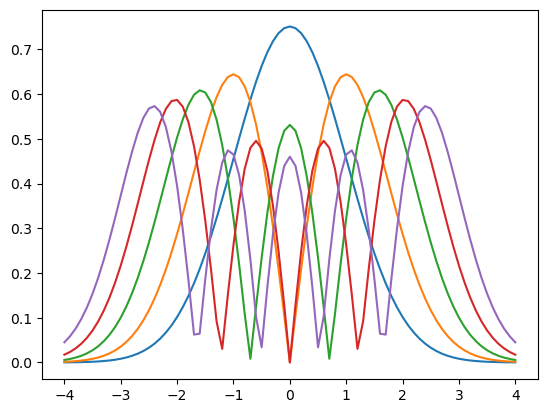

In [70]:
#HW2
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

tol = 1e-6
beta_start = 0                                                          # beta should start at 0 and increase or decrease by some db                                   # random db standard i guess
L = 4
YL1 = [0,0]                                                             #setting up the initial condition matrix to be edited later
xshoot = np.linspace(-L, L, num = 81)

def shoot2(y, x, beta):                                                 # the definition of the converted first order df
    return [y[1], ((x**2) - beta)*y[0]]

betaarray = np.array([[]])
functionarray = np.array([[]])

for mode in range(1,6):
    beta = beta_start
    db = 1
    for j in range(100):
        YL1[0] = 1                                                          #initial conditions
        YL1[1] = np.sqrt(L**2-beta)    
        p = odeint(shoot2, YL1, xshoot, args=(beta,))
        
        if abs(p[-1,1] + np.sqrt(L**2-beta)*p[-1,0]) < tol:                  #cehcking convergence
            betaarray = np.append(betaarray, [beta])
            break
        if (-1) ** (mode+1) * (p[-1,1] + np.sqrt(L**2-beta)*p[-1,0]) > 0:       
            beta = beta + db
        else:
            beta = beta - db/2
            db = db / 2
        
    beta_start = beta + .1 # picking new beta
    norm = np.trapz(p[:,0] **2, xshoot)
    tempfunction = np.abs(p[:,0] / np.sqrt(norm))                           # the absolute value of the eigenfunctions 
    tempfunction = tempfunction.reshape(-1,1)
    plt.plot(xshoot, tempfunction)
    if mode == 1:
        functionarray = tempfunction
    else: 
        functionarray = np.hstack([functionarray, tempfunction])

A2 = betaarray
A1 = functionarray

display(A2.shape)

(81, 5)

(5,)

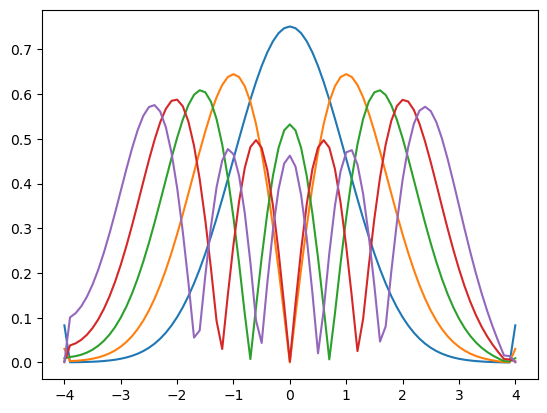

In [68]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

L=4
N=79
x = np.linspace(-L, L, N + 2) 
dx = x[1] - x[0]

A = np.zeros((N, N))
for j in range(N - 1):
    A[j, j + 1] = 1
    A[j + 1, j] = 1
A[0, 0] = 4 / 3               #b/c incorporating the -2 into my P matrix
A[0, 1] = 2 / 3
A[N - 1, N - 1] = 4 / 3       #b/c incorporating the -2 into my P matrix
A[N - 1, N - 2] = -2 / 3

P = np.zeros((N,N))
for j in range(N):
    P[j,j] = -2 - (dx**2) * (x[j+1]**2)
NewA = A+P

#direct solve
D,V = eig(-NewA)
D = D / dx**2
sorted_indices = np.argsort(np.abs(D))
Dsort = D[sorted_indices]
Vsort =V[:, sorted_indices]
D5 = Dsort[0:5] 
V5 = Vsort[:,0:5]


# boundary values 
start = np.array([[]],)
end = np.array([[]])
for j in range(5):
    start = np.append(((-4*V5[0,j]+V5[1,j])/(-3-(2*dx*np.sqrt((L**2)-D5[j])))), start)    #this includes the sqrt bit
for j in range (5):
    end = np.append(((4*V5[len(V5)-1,j]-V5[len(V5)-2,j])/(3+(2*dx*np.sqrt((L**2)-D5[j])))), end)     #this includes the sqrt bit
start= np.reshape(start, (1, start.shape[0]))
end = np.reshape(start, (1, end.shape[0]))

# append boundary points to the V5 matrix
V5 = np.append(start, V5, axis = 0)
V5 = np.append(V5, end, axis = 0)
V5 = abs(V5)


#normalization if needed:
for j in range(5):
    norm = np.trapz(V5[:,j] **2, x)
    tempfunction = np.abs(V5[:,j] / np.sqrt(norm))                           # the absolute value of the eigenfunctions 
    tempfunction = tempfunction.reshape(-1,1)
    V5[:,j] = tempfunction[:,0]

A3 = V5
A4 = D5
#display(A3.shape)
#display(A4.shape)

#plotting   ends look funky, i think thats due to the approx assumption
for j in range(5):
    plt.plot(x,V5[:,j])

In [105]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

L = 2
xspan = np.linspace(-L, L, 20*L+1)
gamma = [-0.05, 0.05]
eign_start = 0 
YL = [0,0]  

def shoot2(y, x, eign, gamma):                                                 # the definition of the converted first order df
    return [y[1], (gamma*(np.abs(y[0]**2) + (x**2) - eign))*y[0]]

for mode in range(1,3):
    
